In [24]:
from PIL import Image
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
import os

# DATASET

In [81]:
def mark_location(img_path, img_id):
    location = []
    file = pd.read_json(img_path + "/" + img_id + ".json")
    for annotations in file["annotations"]:
        for marks in annotations:
            x = marks['coordinates']['x']
            y = marks['coordinates']['y']
            w = marks['coordinates']['width']
            h = marks['coordinates']['height']
            location.extend(
                [(x-w/2, y-h/2),
                (x-w/2, y+h/2),
                (x+w/2, y-h/2),
                (x+w/2, y+h/2)]
            )
    return np.asarray(location)    
    
class ImageDataset(Dataset):
    def __init__(self, img_path, csv_path, transform=None):
        self.img_path = img_path
        self.csv = pd.read_csv(csv_path)
        self.transform = transform
        
    def __len__(self):
        return len(self.csv)
    
    def __getitem__(self, idx):
        image_name = self.csv["id"][idx].strip(" ")+".jpg"
        image = os.path.join(self.img_path, image_name)
        image = np.asarray(Image.open(image))
        try:
            mark = mark_location(self.img_path, image_name[:-4])
        except:
            mark = None
        sample = {"img":image, "mark":mark}
                        
        if self.transform:
            sample = self.transform(sample)
        return sample
                        
img_path = "../taitra_all/second_test/thumbnails"
csv_path = "../taitra_all/second_test/表格資料_edit_meta.csv"
Data = ImageDataset(img_path, csv_path)
Data[0]

{'img': array([[[47, 60, 68],
         [47, 60, 68],
         [47, 60, 68],
         ...,
         [76, 76, 76],
         [76, 76, 76],
         [76, 76, 76]],
 
        [[47, 60, 68],
         [47, 60, 68],
         [47, 60, 68],
         ...,
         [76, 76, 76],
         [76, 76, 76],
         [76, 76, 76]],
 
        [[47, 60, 68],
         [47, 60, 68],
         [47, 60, 68],
         ...,
         [76, 76, 76],
         [76, 76, 76],
         [76, 76, 76]],
 
        ...,
 
        [[76, 76, 76],
         [76, 76, 76],
         [76, 76, 76],
         ...,
         [76, 76, 76],
         [76, 76, 76],
         [76, 76, 76]],
 
        [[76, 76, 76],
         [76, 76, 76],
         [76, 76, 76],
         ...,
         [76, 76, 76],
         [76, 76, 76],
         [76, 76, 76]],
 
        [[76, 76, 76],
         [76, 76, 76],
         [76, 76, 76],
         ...,
         [76, 76, 76],
         [76, 76, 76],
         [76, 76, 76]]], dtype=uint8),
 'mark': array([[461. ,  44.5],
   

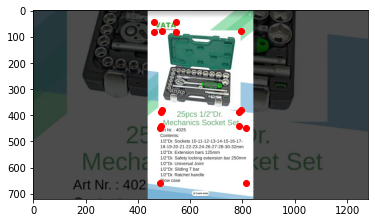

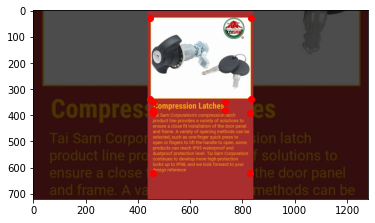

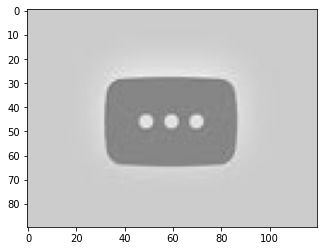

In [83]:
def image_scatter(image, marks):
    """Draw image and label point"""
    plt.imshow(image)
    try:
        plt.scatter(marks[:, 0],marks[:, 1], c="r")
    except:
        pass
    plt.show()

for index in range(3):
    image = Data[index]
    image_scatter(image['img'], image['mark'])

# MODEL

In [ ]:
class Model(nn.Model):
    def __init__(self):
        super().__init__()
        self.conv1 